# Graph Concepts.



In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from nose.tools import assert_equal, assert_is_instance, assert_true
from numpy.testing import assert_array_equal, assert_array_almost_equal

## Directed graph

- Make a directed graph with 22 integer nodes, and edges connecting every even integer node to the next odd integer node. Start from zero (Zero is an even number).

![](images/digraph.png)

In [2]:
def make_circular_dg():
    '''
    Creates a directed graph with 22 integer nodes.
    Every node that is divisible by 3 is connected to the next integer node
    that is divisible by 3.
    
    Paramters
    ---------
    None
    
    Returns
    -------
    A networkx.Digraph instance.
    '''
    
    # YOUR CODE HERE
    
    dg = nx.DiGraph()  
    dg.add_nodes_from(range(22)) 
    for i in range(0,19,3):
        dg.add_edge(i, i+3)
        
    
    return dg

In [3]:
dg = make_circular_dg()

In [4]:
assert_is_instance(dg, nx.DiGraph)

nodes = np.array(dg.nodes())
assert_equal(nodes.size, 22)
assert_equal(nodes.min(), 0)
assert_equal(nodes.max(), 21)
assert_true(np.all(np.diff(nodes) == 1))

edges = np.array(dg.edges())
assert_equal(edges.shape[0], 7)
assert_equal(edges.shape[1], 2)
assert_equal(edges[:, 0].min(), 0)
assert_equal(edges[:, 0].max(), 18)
assert_true(np.all(np.diff(edges[:, 0]) == 3))
assert_equal(edges[:, 1].min(), 3)
assert_equal(edges[:, 1].max(), 21)
assert_true(np.all(np.diff(edges[:, 1]) == 3))

- Draw the directed graph created with `get_circular_dg()`. Note that our function returns a Matplotlib axes instance. You should probably use the `ax` parameter in [NetworkX's drawing function](https://networkx.github.io/documentation/latest/reference/drawing.html).

In [5]:
def draw_circular_dg(dg):
    '''
    Draws a directed graph.
    
    Paramters
    ---------
    dg: A networkx.DiGraph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    
    fig, ax = plt.subplots(figsize=(12, 12))
    nx.draw_circular(dg, with_labels=True)
    plt.show()
    return ax

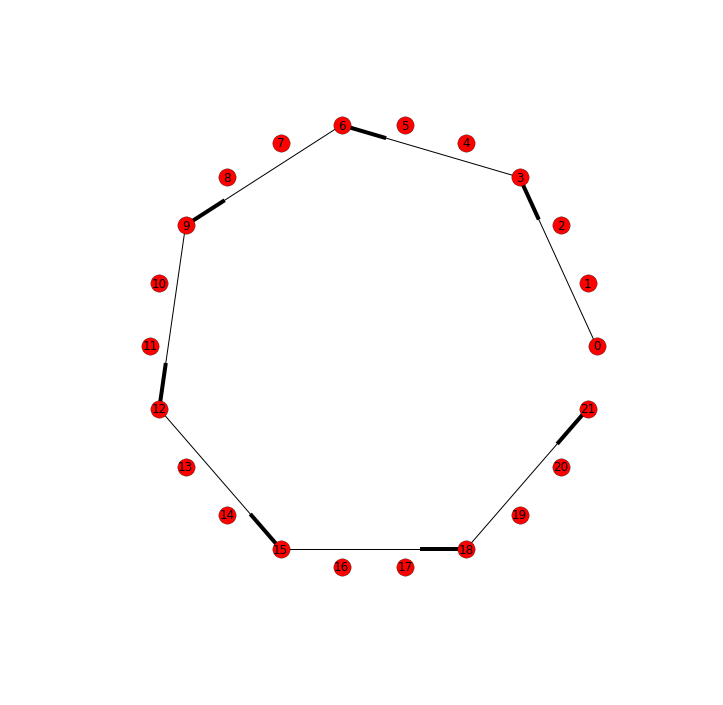

In [6]:
ax1 = draw_circular_dg(dg)
plt.show()

In [7]:
pos = np.array(list(nx.circular_layout(dg).values()))
assert_is_instance(ax1, mpl.axes.Axes)
assert_array_almost_equal(ax1.collections[0].get_offsets(), pos)
for idx, seg in enumerate(ax1.collections[1].get_segments()):
    line = np.vstack((pos[idx * 3], pos[idx * 3 + 3]))
    assert_array_almost_equal(seg, line)
assert_equal(len(ax1.collections[2].get_segments()), 7)

## Multigraph

- Create an undirected multigraph with seven nodes.

![](images/multigraph.png)

In [8]:
def make_multigraph():
    '''
    Creates an undirected multigraph with seven nodes.
    
    Paramters
    ---------
    None
    
    Returns
    -------
    A networkx.MultiGraph instance.
    '''
    
    # YOUR CODE HERE
    mg = nx.MultiGraph()
 
    mg.add_nodes_from(range(7)) 

    
    return mg

In [9]:
mg0 = make_multigraph()

In [10]:
assert_is_instance(mg0, nx.MultiGraph)

nodes = np.array(mg0.nodes())
assert_equal(nodes.size, 7)
assert_equal(nodes.min(), 0)
assert_equal(nodes.max(), 6)
assert_true(np.all(np.diff(nodes) == 1))

assert_equal(len(mg0.edges()), 0)

- Draw the multigraph in circular format. Don't forget to use the `ax` parameter in NetworkX's drawing function.

In [11]:
def draw_multigraph(mg):
    '''
    Draws a multigraph in circular format.
    
    Paramters
    ---------
    mg: A networkx.MultiGraph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize=(12, 12))
    nx.draw_circular(mg, with_labels=True)
    plt.show()
    
    return ax

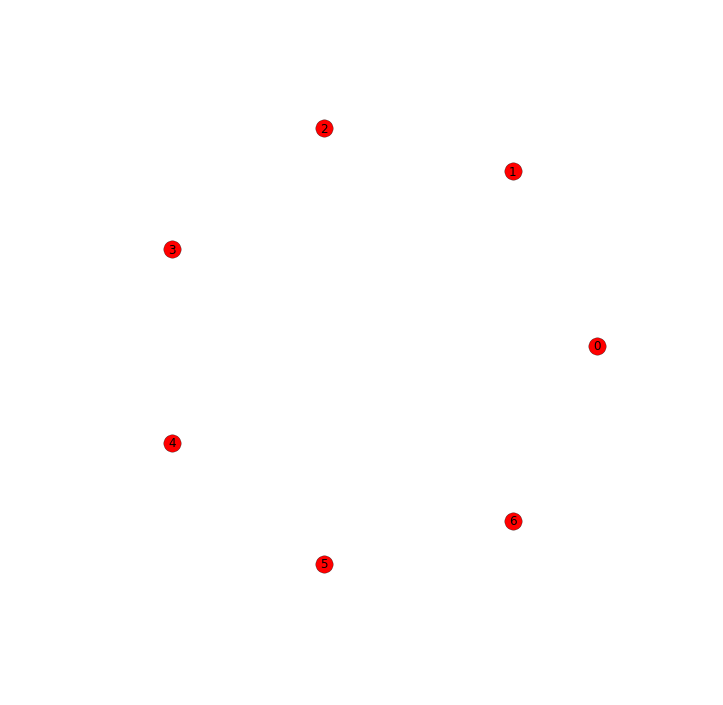

In [12]:
ax2 = draw_multigraph(mg0)
plt.show()

In [13]:
pos = np.array(list(nx.circular_layout(mg0).values()))
assert_is_instance(ax2, mpl.axes.Axes)
assert_equal(len(ax2.collections), 1)
assert_equal(len(ax2.collections[0].get_offsets()), len(mg0.nodes()))

## Add edges

- Add new edges between all even integer nodes (0, 2, 4, 6) and between all odd integer nodes (1, 3, 5). 

![](images/multigraph_edges.png)

In [14]:
def add_edges(mg):
    '''
    Adds new edges between all even integer nodes (0, 2, 4, 6)
    and between all odd integer nodes (1, 3, 5).
    
    Paramters
    ---------
    mg: A networkx.MultiGraph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    from itertools import combinations
    for paired in combinations([0,2,4,6], 2):
        mg.add_edge(paired[0],paired[1])
    for paired in combinations([1,3,5], 2):
        mg.add_edge(paired[0],paired[1])

    return mg

In [15]:
mg1 = add_edges(mg0)

In [16]:
assert_is_instance(mg1, nx.MultiGraph)

nodes = np.array(mg1.nodes())
assert_array_equal(mg1.nodes(), mg0.nodes())

edges = np.array(mg1.edges())
assert_equal(edges.shape[0], 9)
assert_equal(edges.shape[1], 2)
assert_true(np.all((edges[:, 1] - edges[:, 0]) % 2 == 0))

In the following code cell, we reuse `draw_multigraph()` from earlier to draw the new multigraph.

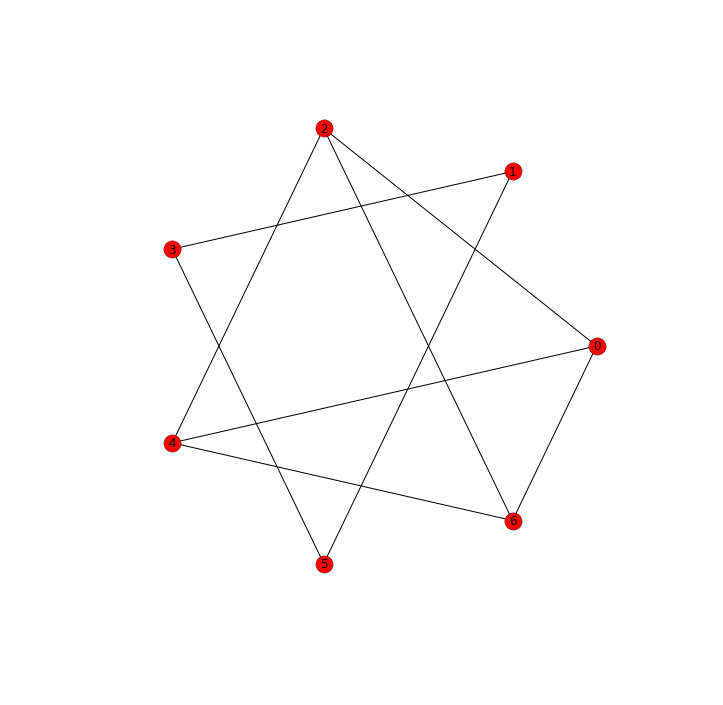

In [17]:
ax3 = draw_multigraph(mg1)
plt.show()

In [18]:
pos = np.array(list(nx.circular_layout(mg1).values()))
assert_is_instance(ax3, mpl.axes.Axes)
assert_equal(len(ax3.collections), 2) # 1 for nodes, 1 for edges
assert_array_almost_equal(ax3.collections[0].get_offsets(), pos)
assert_equal(len(ax3.collections[1].get_segments()), len(mg1.edges()))